# Credit Card Default Prediction Model 1 - Decision Tree Classidier

# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\INeuron_Project\ineuron_creditcard_ml\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

# Drop ID column as statistically Insignificant

In [4]:
df1 = df.drop(labels=['ID'],axis=1)
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Making Sex, Education and Marriage as Object datatypes

In [5]:
df1['SEX']=df['SEX'].astype(str)
df1['EDUCATION']=df['EDUCATION'].astype(str)
df1['MARRIAGE']=df['MARRIAGE'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# Defining X and Y

In [6]:
X = df1.drop(labels=['default.payment.next.month'],axis=1)
Y = df1[['default.payment.next.month']]

# Categorical And Continuous variable Seperation

In [7]:
from definitions import catcon
cat, con = catcon(X)

Categorical and Continuous variables appended


# Getting Dummy values for Categorical variable and Joining with Continuous variable

In [8]:
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
Xnew.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,False,True,False,False,False,False,False,True,False,False
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,False,True,False,False,False,False,False,False,True,False
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,False,True,False,False,False,False,False,False,True,False
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,False,True,False,False,False,False,False,True,False,False
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,False,True,False,False,False,False,False,True,False,False


# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Decision Tree Base Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy")
model = dtc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.9995
Testing Accuracy  :  0.7293
Training Recall   :  0.9979
Testing Recall    :  0.4004


<Axes: >

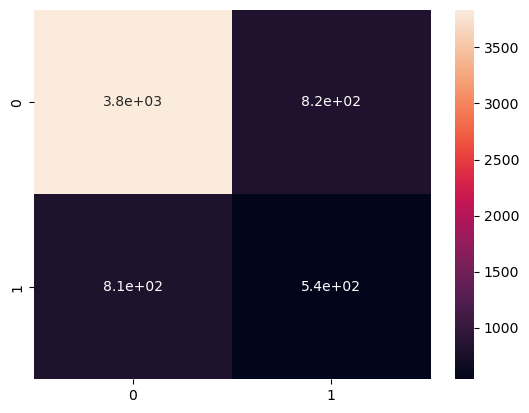

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True)

# Model 1.1 Decision Tree with Max Depth and Gridsearch CV

In [12]:
tg = {"max_depth":range(2,20,1),"criterion":['gini','entropy']}
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [13]:
model11 = DecisionTreeClassifier(random_state=21,criterion="entropy",max_depth=3)
model11 = model11.fit(xtrain,ytrain)
tr_pred = model11.predict(xtrain)
ts_pred = model11.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc11 = accuracy_score(ytrain,tr_pred)
ts_acc11 = accuracy_score(ytest,ts_pred)
tr_rec11 = recall_score(ytrain,tr_pred)
ts_rec11 = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc11,4))
print('Testing Accuracy  : ',round(ts_acc11,4))
print('Training Recall   : ',round(tr_rec11,4))
print('Testing Recall    : ',round(ts_rec11,4))

Training Accuracy :  0.8213
Testing Accuracy  :  0.8217
Training Recall   :  0.3796
Testing Recall    :  0.3796


<Axes: >

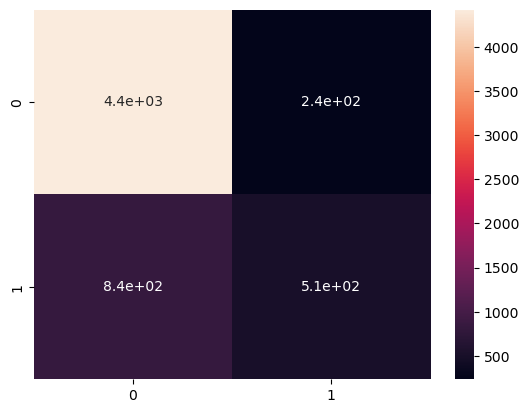

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf1 = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf1,annot=True)

# Model 1.2 Deceison tree gridesearch cv with Min_Samples_Split

In [15]:
tg = {"min_samples_split":range(2,20,1),"criterion":['gini','entropy']}
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_


{'criterion': 'gini', 'min_samples_split': 19}

In [16]:
model12 = DecisionTreeClassifier(random_state=21,criterion="gini",min_samples_split=19)
model12 = model12.fit(xtrain,ytrain)
tr_pred = model12.predict(xtrain)
ts_pred = model12.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc12 = accuracy_score(ytrain,tr_pred)
ts_acc12 = accuracy_score(ytest,ts_pred)
tr_rec12 = recall_score(ytrain,tr_pred)
ts_rec12 = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc12,4))
print('Testing Accuracy  : ',round(ts_acc12,4))
print('Training Recall   : ',round(tr_rec12,4))
print('Testing Recall    : ',round(ts_rec12,4))

Training Accuracy :  0.9015
Testing Accuracy  :  0.7523
Training Recall   :  0.6907
Testing Recall    :  0.3789


<Axes: >

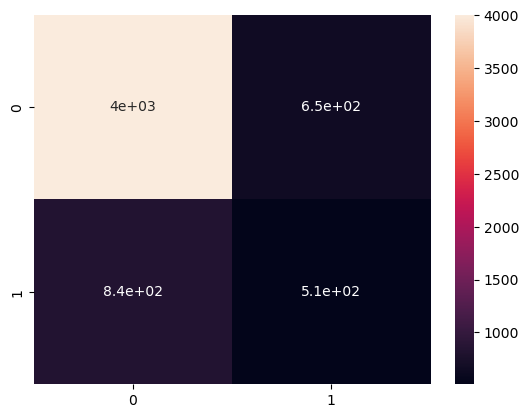

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf2 = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf2,annot=True)

# Models Performance Summary

In [18]:
dct = {
    'Model':['BaseModel','Model 1.1','Model 1.2'],
    'Training Accuracy':[tr_acc,tr_acc11,tr_acc12],
    'Testing Accuracy' :[ts_acc,ts_acc11,ts_acc12]
}

In [19]:
summary = pd.DataFrame(dct)
summary

,Model,Training Accuracy,Testing Accuracy
0,BaseModel,0.999500,0.729333
1,Model 1.1,0.821333,0.821667
2,Model 1.2,0.901542,0.752333


# Best Model is Model 1.1 here because of Highest Test accuracy

# Checking Column Importance according to Model 1.1

In [20]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model11.feature_importances_

In [21]:
Q = Q.sort_values(by=["imp"],ascending=False)
Q.index = Q['col']
Q = Q.drop(labels=['col'],axis=1)

In [22]:
Q

,imp
col,
PAY_0,0.712556
PAY_2,0.183817
PAY_AMT2,0.074693
PAY_3,0.011900
PAY_6,0.007214
PAY_5,0.006524
PAY_AMT4,0.003297
LIMIT_BAL,0.000000
EDUCATION_3,0.000000


<Axes: xlabel='col'>

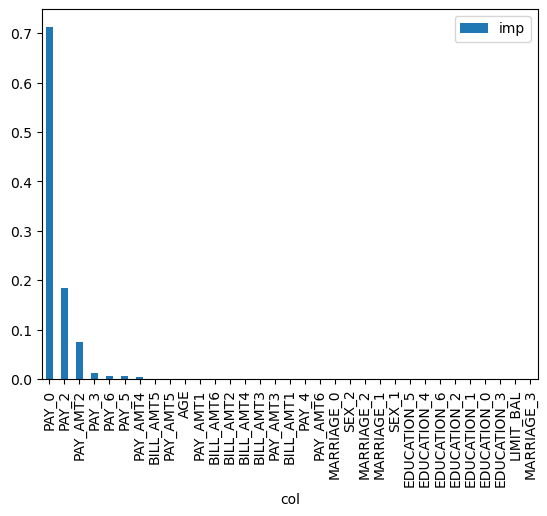

In [23]:
Q.sort_values(by=["imp"],ascending=False).plot(kind='bar')

# Saving Best Model 1.1 Pickle file for Later Use

In [27]:

import pickle
with open('./Modelss/dtcmodel.pkl', 'wb') as files:
    pickle.dump(model12, files)